# Uncertainty Estimates from Classifiers
With the GradientBoostingClassifier classifier, which has both a decision_function and a predict_proba method.

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_blobs, make_circles
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import mglearn

## Binary classification

### The Decision Function
The values of the decision function encodes how strongly the model believes a data point to belong to the “positive” class. Positive values indicate a preference for the positive class, and negative values indicate a preference for the “negative” (other) class.

In [22]:
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)
# we rename the classes "blue" and "red" for illustration purposes
y_named = np.array(["blue", "red"])[y]
# we can call train_test_split with arbitrarily many arrays;
# all will be split in a consistent manner
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
train_test_split(X, y_named, y, random_state=0)
# build the gradient boosting model
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(random_state=0)

In the binary classification case, the return value of decision_function is of shape (n_samples,), and it returns one floating-point number for each sample

In [23]:
print(f"X_test.shape: {X_test.shape}")
print(f"Decision function shape: {gbrt.decision_function(X_test).shape}")
#show the first few entries of decision_function
print(f"Decision function:\n{gbrt.decision_function(X_test)[:6]}")

X_test.shape: (25, 2)
Decision function shape: (25,)
Decision function:
[ 4.13592603 -1.70169917 -3.95106099 -3.62609552  4.28986642  3.66166081]


In [24]:
print(f"Thresholded decision function:\n{gbrt.decision_function(X_test) > 0}")
print(f"Predictions:\n{gbrt.predict(X_test)}")

Thresholded decision function:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Predictions:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [25]:
# make the boolean True/False into 0 and 1
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
# use 0 and 1 as indices into classes_
pred = gbrt.classes_[greater_zero]
# pred is the same as the output of gbrt.predict
print("pred is equal to predictions: {}".format(np.all(pred == gbrt.predict(X_test))))

pred is equal to predictions: True


In [26]:
decision_function = gbrt.decision_function(X_test)
print(f"Decision function minimum: {np.min(decision_function):.2f} maximum: {np.max(decision_function):.2f}")

Decision function minimum: -7.69 maximum: 4.29


Plot the decision_function for all points in the 2D plane using a color coding, next to a visualization of the decision boundary.

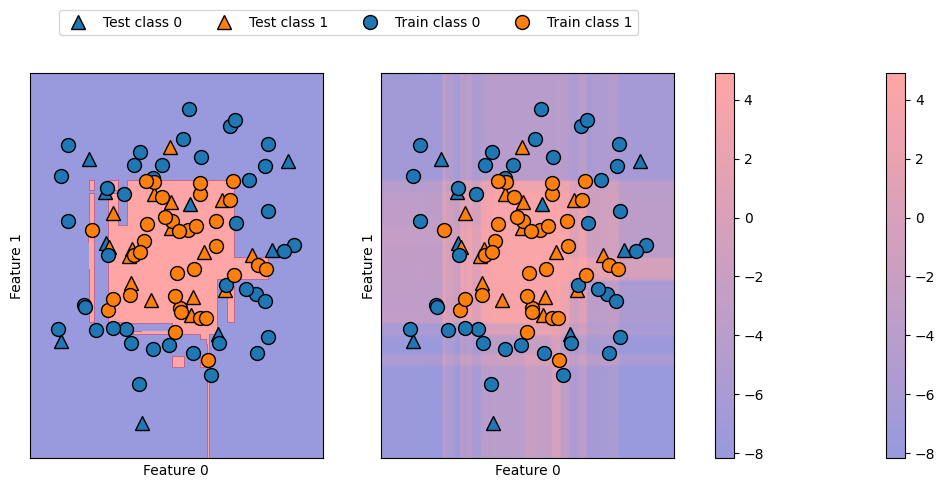

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,
fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
alpha=.4, cm=mglearn.ReBl)
for ax in axes:
    # plot training and test points
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
    markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
    markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    cbar = plt.colorbar(scores_image, ax=axes.tolist())
    axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
    "Train class 1"], ncol=4, loc=(.1, 1.1))

### Predicting Probabilities
In a binary classifier, the first entry in each row is the estimated probability of the first class, and the second entry is the estimated probability of the second class. Because it is a probability, the output of predict_proba is always between 0 and 1.

In [28]:
print(f"Shape of probabilities: {gbrt.predict_proba(X_test).shape}")
print(f"Predicted probabilities:\n{gbrt.predict_proba(X_test[:6])}")

Shape of probabilities: (25, 2)
Predicted probabilities:
[[0.01573626 0.98426374]
 [0.84575653 0.15424347]
 [0.98112869 0.01887131]
 [0.97407033 0.02592967]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


#### Plot the decision boundary on the dataset, next to the class probabilities for the class 1

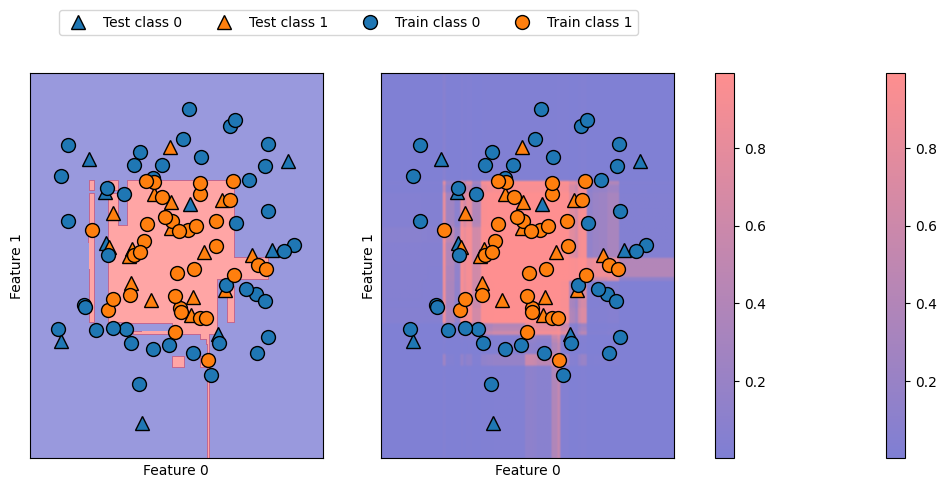

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(
gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(
gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')
for ax in axes:
    # plot training and test points
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
    markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
    markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    cbar = plt.colorbar(scores_image, ax=axes.tolist())
    axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
    "Train class 1"], ncol=4, loc=(.1, 1.1))

## Uncertainty in Multiclass Classification

In [30]:
from sklearn.datasets import load_iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
iris.data, iris.target, random_state=42)
gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

In the multiclass case, the decision_function has the shape (n_samples,n_classes) and each column provides a “certainty score” for each class, where a large score means that a class is more likely and a small score means the class is less likely. You can recover the predictions from these scores by finding the maximum entry for each data point.

In [33]:
print(f"Decision function shape: {gbrt.decision_function(X_test).shape}")
# plot the first few entries of the decision function
print(f"Decision function:\n{gbrt.decision_function(X_test)[:6, :]}")
print(f"Argmax of decision function:\n{np.argmax(gbrt.decision_function(X_test), axis=1)}")
print(f"Predictions:\n{gbrt.predict(X_test)}")

Decision function shape: (38, 3)
Decision function:
[[-0.89604809  1.14724958 -0.82754003]
 [ 1.16113086 -0.80789044 -0.82827067]
 [-0.89091511 -0.77671169  1.19653416]
 [-0.89604809  1.14724958 -0.82754003]
 [-0.89763468  0.96497584 -0.10374792]
 [ 1.16113086 -0.80789044 -0.82827067]]
Argmax of decision function:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [34]:
# show the first few entries of predict_proba
print(f"Predicted probabilities:\n{gbrt.predict_proba(X_test)[:6]}")
# show that sums across rows are one
print(f"Sums: {gbrt.predict_proba(X_test)[:6].sum(axis=1)}")

Predicted probabilities:
[[0.10217718 0.78840034 0.10942248]
 [0.78347147 0.10936745 0.10716108]
 [0.09818072 0.11005864 0.79176065]
 [0.10217718 0.78840034 0.10942248]
 [0.10360005 0.66723901 0.22916094]
 [0.78347147 0.10936745 0.10716108]]
Sums: [1. 1. 1. 1. 1. 1.]
